In [26]:
# importing the required modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver

In [27]:
# lets take the basic url
base_url = "https://m.kin.naver.com/mobile/expert/category/bridge?groupCategoryId=153"

# start web browser
driver = webdriver.Chrome(r'C:\Users\USER\chromedriver_win32\chromedriver.exe')  # Optional argument, if not specified will search path.

In [28]:
# get source code
driver.get(base_url)
# dir(driver)

In [29]:
elem = driver.find_element_by_xpath("//*")
source_code = elem.get_attribute("outerHTML")

In [30]:
type(source_code)

str

'<html lang="ko"><head>\n\t\n\t\t<!-- IE 호환성보기 이슈 수정을 위한 Meta 태그 추가 -->\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\t\t\n\t\t\n\t\t\n\t\t\n\t\t\t<link rel="apple-touch-icon-precomposed" sizes="114x114" href="/static/mobileweb_icon_114.png">\n\t\t\t<link rel="apple-touch-icon-precomposed" href="/static/mobileweb_icon_57.png">\n\t\t\n\t\n\t<meta http-equiv="Content-Type" content="text/html;charset=utf-8">\n\t\n\t<meta name="msapplication-config" content="none">\n\n\t\n\t\t\n\t\t\t<meta name="robots" content="index,nofollow">\n\t\t\n\t\t\n\t\n\n\t\n\t\t\n\t\t\n\t\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densitydpi=medium-dpi">\n\t\t\n\t\t\n\t\n\n\t\n\n\t<script type="text/javascript">\n\t\ttry {\n\t\t\tdocument.domain = "naver.com";\n\t\t} catch (e) {\n\t\t}\n\t</script>\n\n\t<link rel="image_src" href="https://ssl.pstatic.net/static/kin/common/kin_thumbnail_w
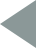
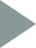

In [31]:
source_code

<html lang="ko">
 <head>
  <!-- IE 호환성보기 이슈 수정을 위한 Meta 태그 추가 -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="/static/mobileweb_icon_114.png" rel="apple-touch-icon-precomposed" sizes="114x114"/>
  <link href="/static/mobileweb_icon_57.png" rel="apple-touch-icon-precomposed"/>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <meta content="none" name="msapplication-config"/>
  <meta content="index,nofollow" name="robots"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densitydpi=medium-dpi" name="viewport"/>
  <script type="text/javascript">
   try {
			document.domain = "naver.com";
		} catch (e) {
		}
  </script>
  <link href="https://ssl.pstatic.net/static/kin/common/kin_thumbnail_w100.png" rel="image_src"/>
  <link href="/favicon.ico?v=2.2" rel="shortcut icon" type="image/x-icon"/>
  <meta content="네이버 eXpert : 네이버 지식iN" name="title"/>
  <title>
   네이버 
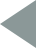
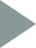

In [32]:
soup = BeautifulSoup(source_code, 'html.parser')
print(soup.prettify())

In [35]:
li = soup.find_all("li", class_ = "categoryItem--2egO7")
len(li)

93

In [36]:
a = []
for i in range(len(li)):
    a.append(li[i].find('a', class_="categoryLink--ZUSGn").get("href"))

In [126]:
a

['#',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=149&categoryId=90',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=149&categoryId=2',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=149&categoryId=320',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=149&categoryId=129',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=149&categoryId=122',
 '#',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=153&categoryId=1',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=153&categoryId=58',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=153&categoryId=183',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=153&categoryId=435',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=153&categoryId=293',
 'https://m.kin.naver.com/mobile/expert/category/home?groupCategoryId=153&categoryId

In [136]:
bb = []

for j in range(len(a)):
    if a[j] == "#":
        continue
    else:
        l = len(a[j])
        val = a[j]
        newval = val[0:l]
        bb.append(newval)

In [141]:
len(bb)

81

In [142]:
len(set(bb))

81

In [143]:
df = pd.DataFrame(bb)
df

,0
0,https://m.kin.naver.com/mobile/expert/category...
1,https://m.kin.naver.com/mobile/expert/category...
2,https://m.kin.naver.com/mobile/expert/category...
3,https://m.kin.naver.com/mobile/expert/category...
4,https://m.kin.naver.com/mobile/expert/category...
...,...
76,https://m.kin.naver.com/mobile/expert/category...
77,https://m.kin.naver.com/mobile/expert/category...
78,https://m.kin.naver.com/mobile/expert/category...
79,https://m.kin.naver.com/mobile/expert/category...


In [145]:
df.to_csv('Data/links.csv')